In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import os
import numpy as np

In [10]:
def renombrar_archivos(folder_path, texto_antiguo, texto_nuevo):
    """
    Recorre una carpeta y renombra los archivos que contienen 
    'texto_antiguo' por 'texto_nuevo'.
    """
    
    # Comprobar si la ruta de la carpeta es válida
    if not os.path.isdir(folder_path):
        print(f"Error: La carpeta '{folder_path}' no existe.")
        return

    print(f"Buscando en: {os.path.abspath(folder_path)}\n")
    
    # Contar los archivos renombrados
    contador = 0
    
    # Iterar sobre todos los archivos en el directorio
    for nombre_archivo in os.listdir(folder_path):
        
        # Comprobar si el texto_antiguo está en el nombre del archivo
        if texto_antiguo in nombre_archivo:
            
            # Crear el nuevo nombre del archivo
            nuevo_nombre_archivo = nombre_archivo.replace(texto_antiguo, texto_nuevo)
            
            # Obtener las rutas completas
            ruta_antigua = os.path.join(folder_path, nombre_archivo)
            ruta_nueva = os.path.join(folder_path, nuevo_nombre_archivo)
            
            # Renombrar el archivo (solo si es un archivo, no una carpeta)
            if os.path.isfile(ruta_antigua):
                try:
                    os.rename(ruta_antigua, ruta_nueva)
                    print(f"Renombrado: '{nombre_archivo}'  ->  '{nuevo_nombre_archivo}'")
                    contador += 1
                except OSError as e:
                    print(f"Error al renombrar '{nombre_archivo}': {e}")
            
    if contador == 0:
        print(f"No se encontraron archivos que contengan '{texto_antiguo}'.")
    else:
        print(f"\nProceso completado. Se renombraron {contador} archivos.")

# --- CONFIGURACIÓN ---
# 1. Cambia '.' por la ruta de tu carpeta
#    Ejemplos:
#    En Windows: r"C:\Users\TuUsuario\Documentos\MiCarpeta"
#    En macOS/Linux: "/home/TuUsuario/Documentos/MiCarpeta"
ruta_de_la_carpeta = './reparar/'  # '.' significa 'la carpeta actual donde se ejecuta el script'

# 2. Define los textos a buscar y reemplazar
buscar = "ss03"
reemplazar_con = "ss03-ss05"

# --- EJECUTAR EL SCRIPT ---
if __name__ == "__main__":
    renombrar_archivos(ruta_de_la_carpeta, buscar, reemplazar_con)

Buscando en: c:\OneDrive - TMA\Backup Personal\Maestría Data Mining\Data Mining en Economía y Finanzas\Project_Wednesday\reparar

Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_1117668684.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03-ss05_semilla_1117668684.txt'
Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_1371336364.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03-ss05_semilla_1371336364.txt'
Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_1386299423.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03-ss05_semilla_1386299423.txt'
Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_1650770698.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03-ss05_semilla_1650770698.txt'
Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_1730670187.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03-ss05_semilla_1730670187.txt'
Renombrado: 'modelo_final_test_Compe_02_V4_2ob_ss03_semilla_2153453051.txt'  ->  'modelo_final_test_Compe_02_V4_2ob_ss03

Procesando 122 archivos...

--- Generando Gráficos Detallados (Semillas + Promedio) ---


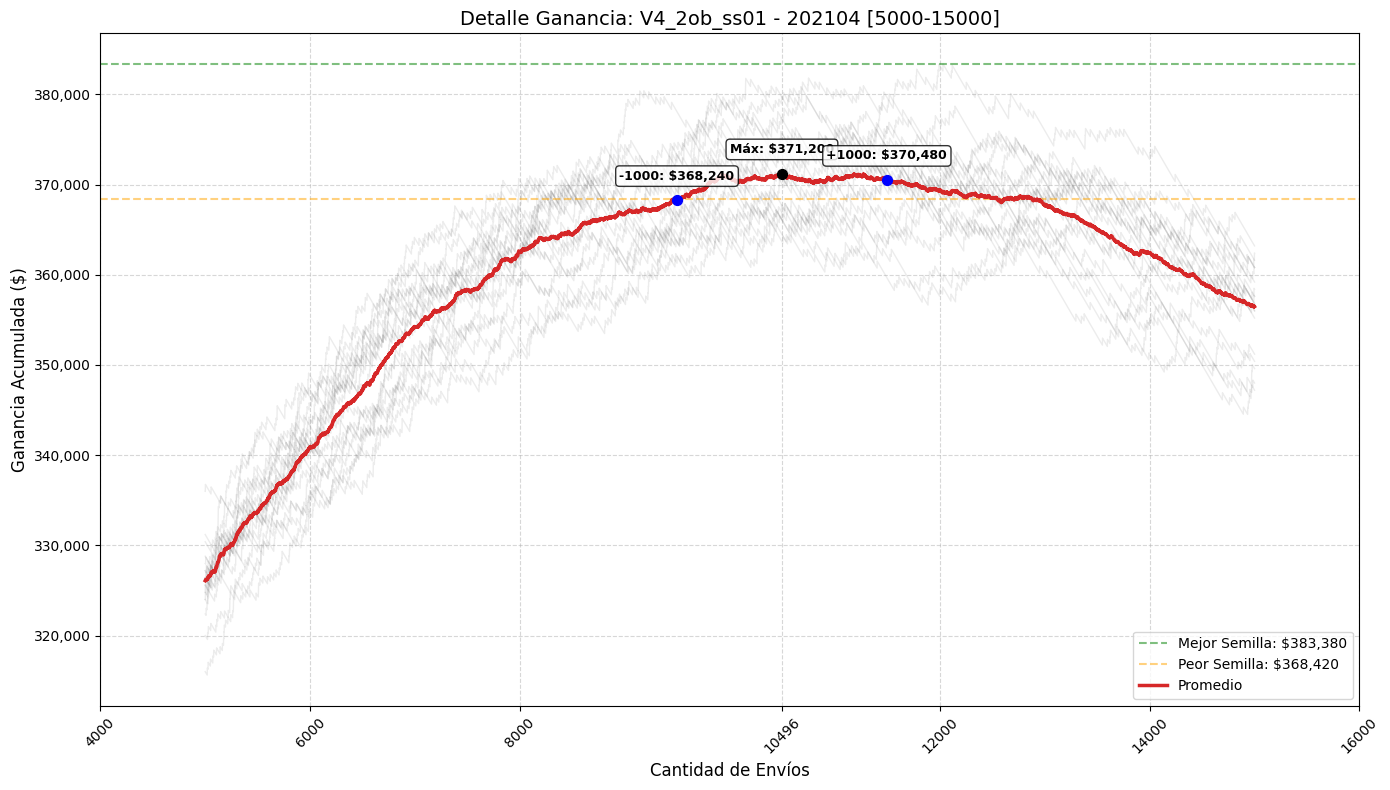

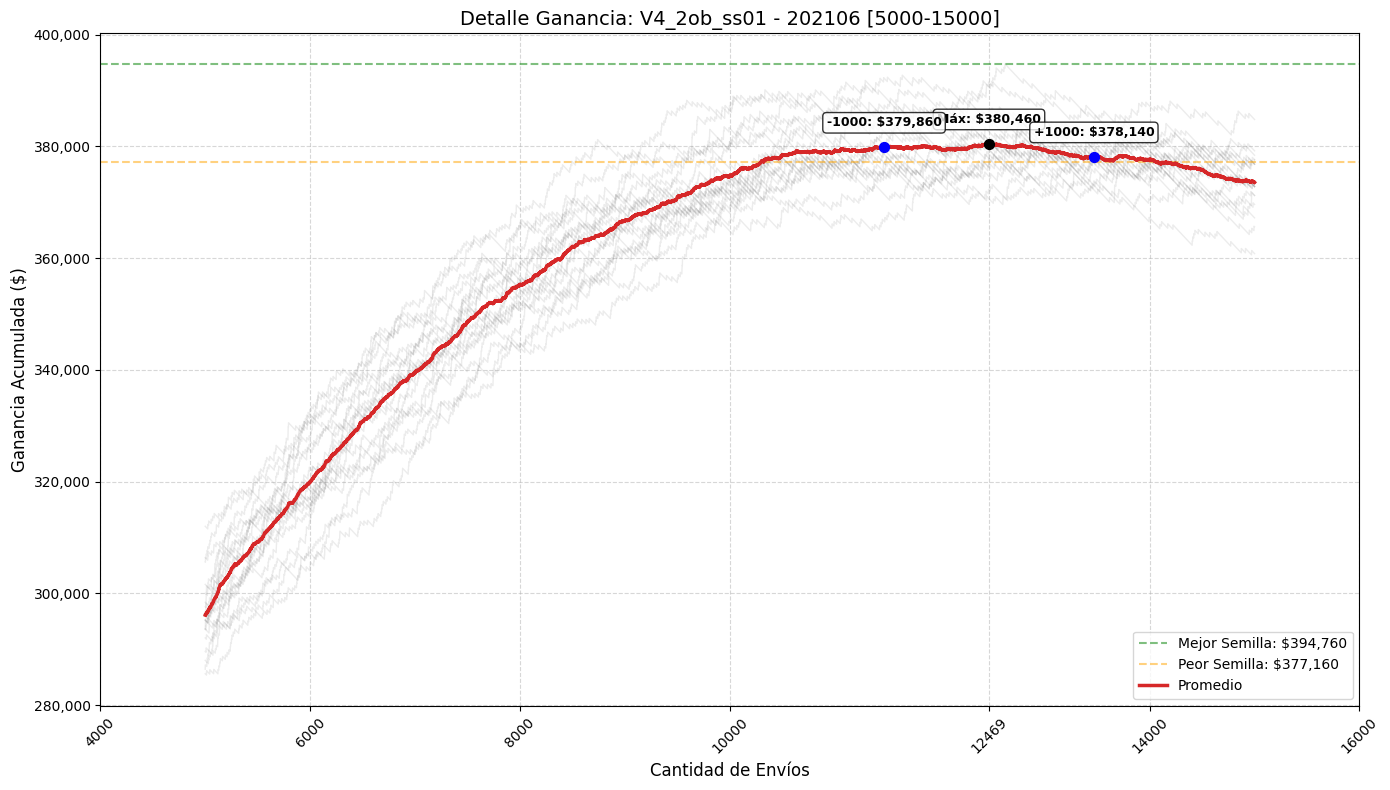

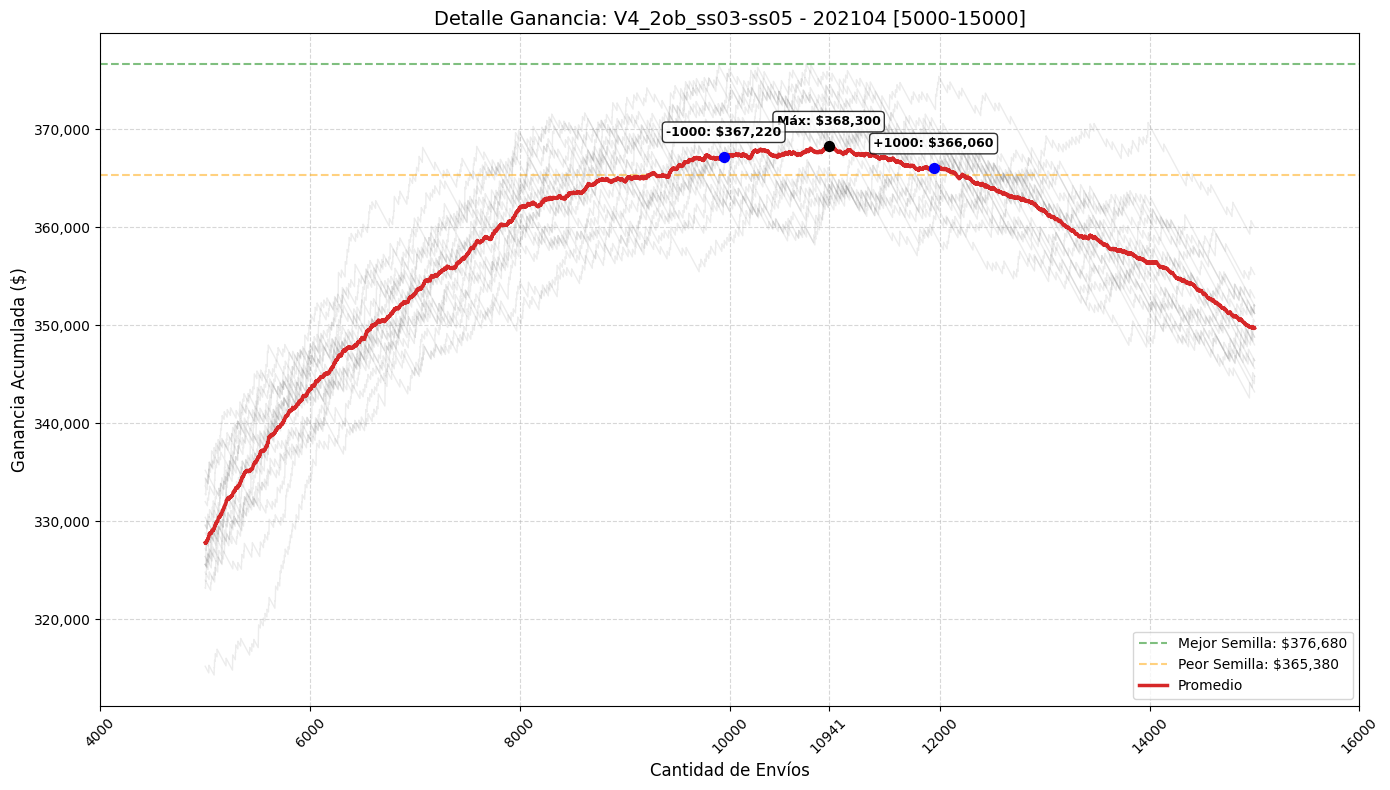

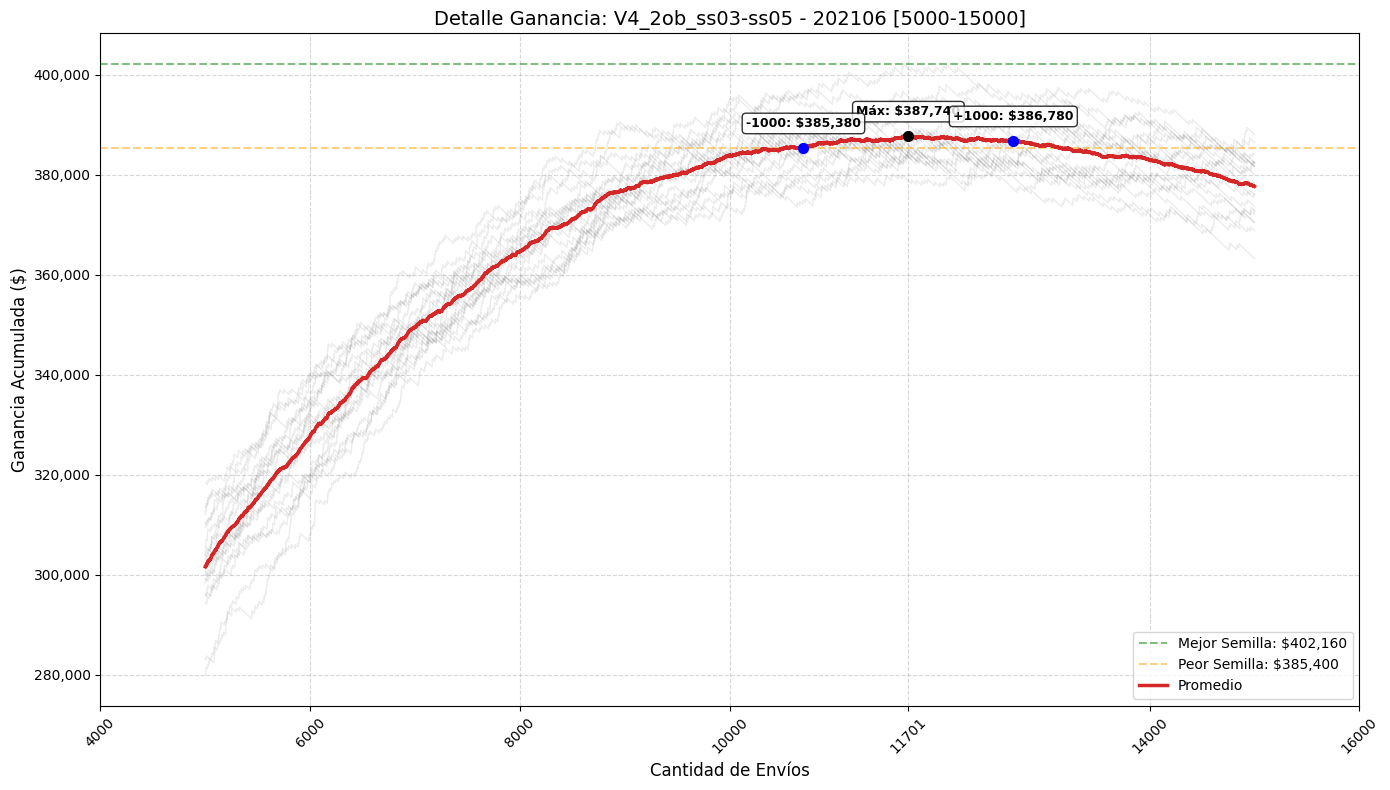

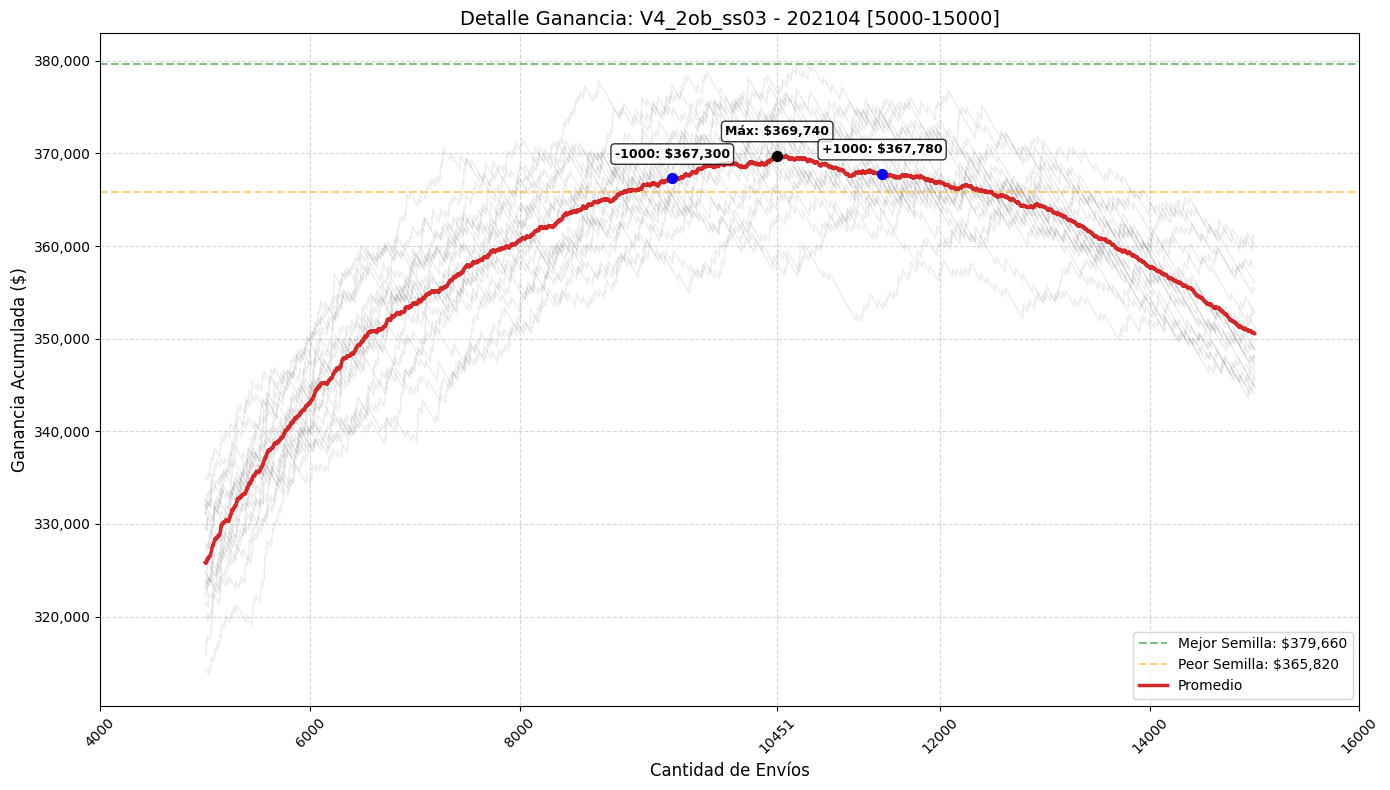

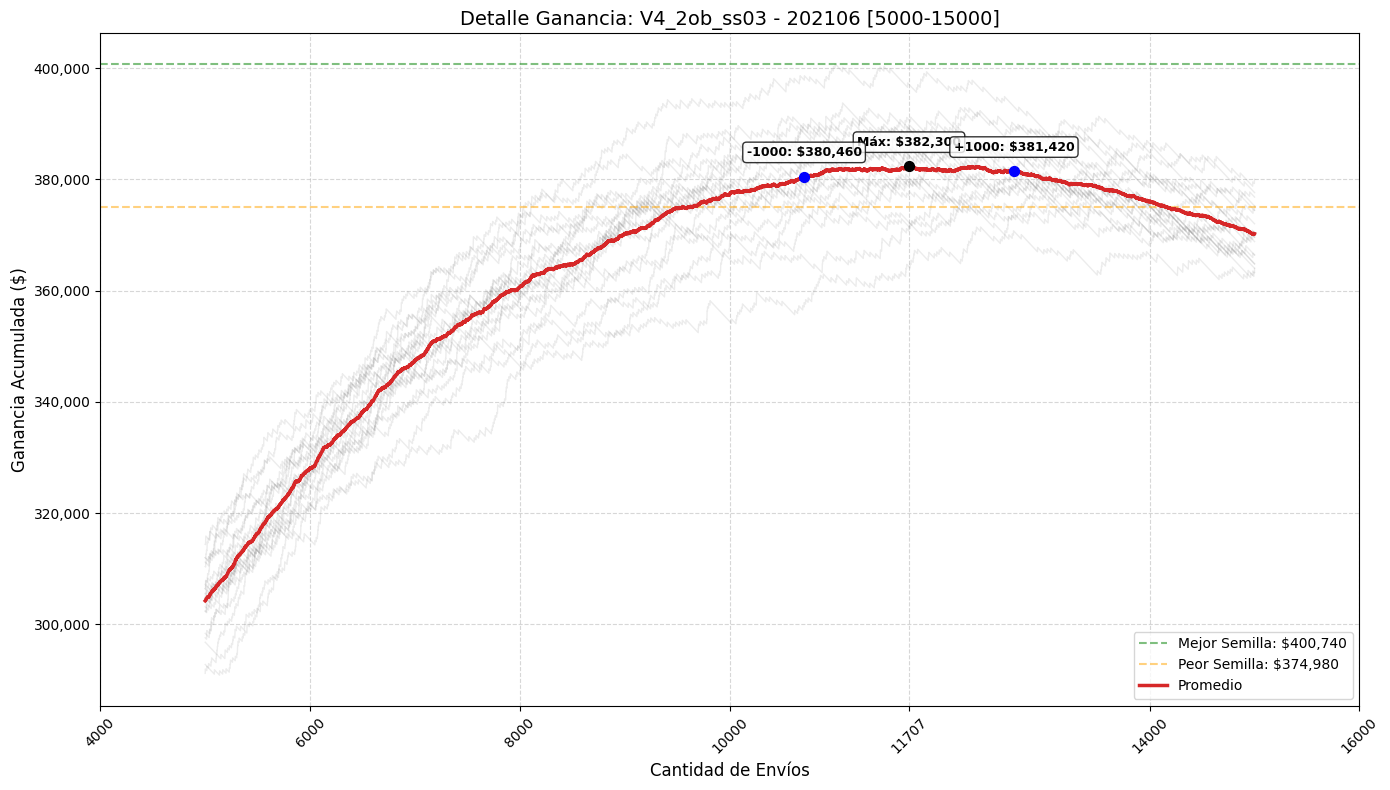


--- Generando Gráficos Comparativos (Promedios por Mes) ---


C:\Users\terang\AppData\Local\Temp\ipykernel_26880\4085597559.py:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', 10)


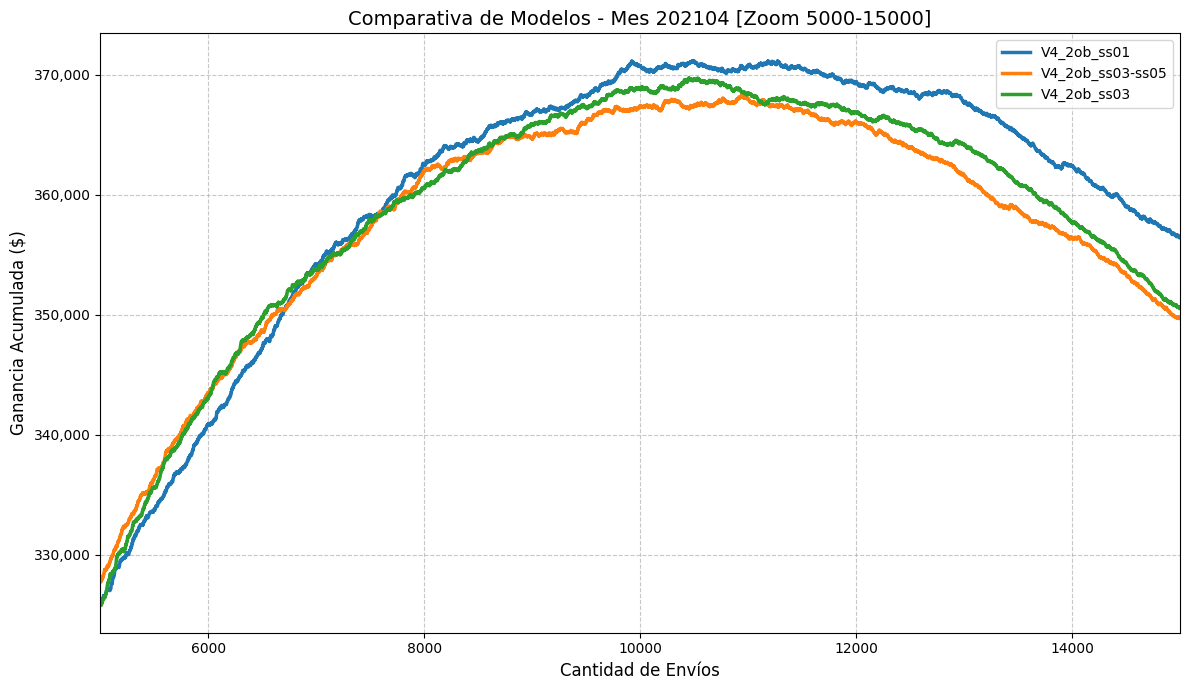

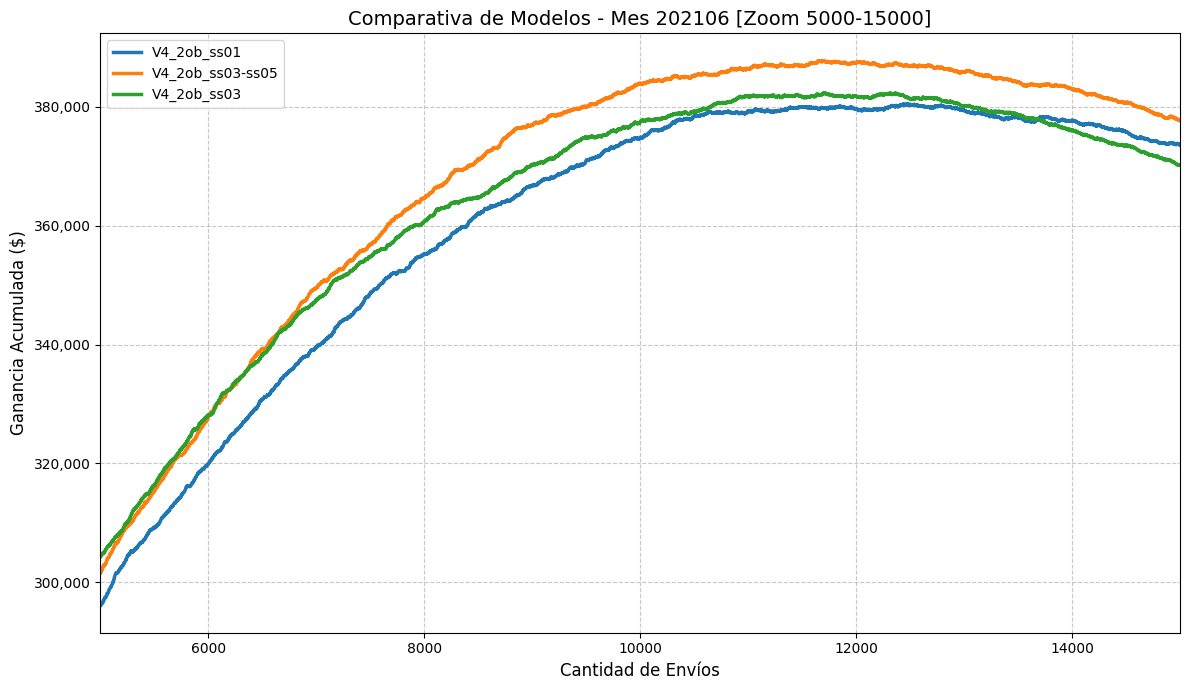

In [12]:
# ================= CONFIGURACIÓN =================
RUTA_CARPETA = './colaborativos' 

# ================= CONFIGURACIÓN =================

GANANCIA_UNITARIA = 780
COSTO_UNITARIO = -20

# Eje X: Cantidad de Envíos (Clientes)
X_LIM_MIN = 5000    
X_LIM_MAX = 15000   

# Eje Y: Ganancia ($) (None = automático)
Y_LIM_MIN = 200 
Y_LIM_MAX = None 

PATRON_REGEX = r"predicciones_test_ordenadas_Compe_02_(.*?)_mes_(\d+)_semilla_modelo_(\d+)"
# =================================================

def formatear_moneda(valor):
    return f"${int(valor):,}"

def procesar_archivos():
    archivos = glob.glob(os.path.join(RUTA_CARPETA, "*.csv"))
    if not archivos:
        print("No se encontraron archivos .csv")
        return

    datos_agrupados = {}
    print(f"Procesando {len(archivos)} archivos...")

    for archivo in archivos:
        nombre_archivo = os.path.basename(archivo)
        match = re.search(PATRON_REGEX, nombre_archivo)
        if match:
            llave = (match.group(1), match.group(2)) # (Modelo, Mes)
            
            try:
                df = pd.read_csv(archivo)
                df['ganancia'] = np.where(df['clase_peso'] == 3, GANANCIA_UNITARIA, COSTO_UNITARIO)
                df['ganancia_acumulada'] = df['ganancia'].cumsum()
                df['envios'] = np.arange(1, len(df) + 1)
                
                # Recortamos datos (un poco más allá del límite) para optimizar RAM
                df_plot = df[df['envios'] <= (X_LIM_MAX + 5000)][['envios', 'ganancia_acumulada']].copy()
                
                if llave not in datos_agrupados:
                    datos_agrupados[llave] = []
                datos_agrupados[llave].append(df_plot)
            except Exception as e:
                print(f"Error leyendo {nombre_archivo}: {e}")

    # --- NUEVA ESTRUCTURA PARA GUARDAR PROMEDIOS ---
    # Almacenará: {'mes_1': [('modelo_A', df_prom_A), ('modelo_B', df_prom_B)], 'mes_2': [...]}
    promedios_por_mes = {}

    # --- GRAFICACIÓN 1: DETALLE POR MODELO-MES (Semillas + Promedio) ---
    print("\n--- Generando Gráficos Detallados (Semillas + Promedio) ---")
    
    for (modelo, mes), lista_dfs in datos_agrupados.items():
        fig, ax = plt.subplots(figsize=(14, 8))
        
        maximos_por_semilla = []

        # 1. Curvas individuales
        for df_semilla in lista_dfs:
            mask = (df_semilla['envios'] >= X_LIM_MIN) & (df_semilla['envios'] <= X_LIM_MAX)
            segmento = df_semilla[mask]
            
            if not segmento.empty:
                ax.plot(segmento['envios'], segmento['ganancia_acumulada'], 
                        color='gray', alpha=0.15, linewidth=1)
            
            maximos_por_semilla.append(df_semilla['ganancia_acumulada'].max())

        # 2. Líneas de Rango (Max-Max y Min-Max)
        if maximos_por_semilla:
            max_de_maximos = max(maximos_por_semilla)
            min_de_maximos = min(maximos_por_semilla)
            ax.axhline(y=max_de_maximos, color='green', linestyle='--', alpha=0.5, label=f'Mejor Semilla: {formatear_moneda(max_de_maximos)}')
            ax.axhline(y=min_de_maximos, color='orange', linestyle='--', alpha=0.5, label=f'Peor Semilla: {formatear_moneda(min_de_maximos)}')

        # 3. Curva Promedio
        if lista_dfs:
            df_concat = pd.concat(lista_dfs)
            df_promedio = df_concat.groupby('envios')['ganancia_acumulada'].mean()
            
            # --- !! GUARDAMOS EL PROMEDIO !! ---
            if mes not in promedios_por_mes:
                promedios_por_mes[mes] = []
            promedios_por_mes[mes].append((modelo, df_promedio.copy()))
            # --- Fin del guardado ---

            df_prom_plot = df_promedio[(df_promedio.index >= X_LIM_MIN) & (df_promedio.index <= X_LIM_MAX)]
            ax.plot(df_prom_plot.index, df_prom_plot.values, color='#D62728', linewidth=2.5, label='Promedio')

            # --- Puntos Clave ---
            x_optimo = df_promedio.idxmax()
            y_optimo = df_promedio.max()
            puntos_interes = [x_optimo]
            etiquetas = [f"Máx: {formatear_moneda(y_optimo)}"]
            colores = ['black']

            for offset in [-1000, 1000]:
                x_vecino = x_optimo + offset
                if x_vecino in df_promedio.index:
                    y_vecino = df_promedio.loc[x_vecino]
                    puntos_interes.append(x_vecino)
                    etiquetas.append(f"{'+' if offset>0 else ''}{offset}: {formatear_moneda(y_vecino)}")
                    colores.append('blue')

            for x, y, txt, col in zip(puntos_interes, [df_promedio.loc[p] for p in puntos_interes], etiquetas, colores):
                if X_LIM_MIN <= x <= X_LIM_MAX:
                    ax.scatter([x], [y], color=col, zorder=5, s=50)
                    ax.annotate(txt, (x, y), xytext=(0, 15), textcoords='offset points', 
                                ha='center', fontsize=9, fontweight='bold',
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

            # --- Ejes y Ticks ---
            ax.set_xlim(X_LIM_MIN, X_LIM_MAX)
            if Y_LIM_MIN is not None and Y_LIM_MAX is not None:
                ax.set_ylim(Y_LIM_MIN, Y_LIM_MAX)
            
            ticks = list(ax.get_xticks())
            if X_LIM_MIN <= x_optimo <= X_LIM_MAX:
                ticks = [t for t in ticks if abs(t - x_optimo) > ((X_LIM_MAX - X_LIM_MIN)/15)]
                ticks.append(x_optimo)
                ticks.sort()
                ax.set_xticks(ticks)
            plt.xticks(rotation=45)

        # Formato final
        plt.title(f"Detalle Ganancia: {modelo} - {mes} [{X_LIM_MIN}-{X_LIM_MAX}]", fontsize=14)
        plt.xlabel("Cantidad de Envíos", fontsize=12)
        plt.ylabel("Ganancia Acumulada ($)", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend(loc='lower right')
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.tight_layout()
        plt.show()

    # --- GRAFICACIÓN 2: COMPARATIVA POR MES (Solo Promedios) ---
    print("\n--- Generando Gráficos Comparativos (Promedios por Mes) ---")

    # Usamos un mapa de color para dar un color distinto a cada modelo
    colores = plt.cm.get_cmap('tab10', 10) 

    for mes, lista_modelos_promedio in promedios_por_mes.items():
        fig, ax = plt.subplots(figsize=(12, 7))
        
        # Iteramos sobre los modelos guardados para este mes
        for i, (modelo, df_promedio) in enumerate(lista_modelos_promedio):
            
            # Recortamos el promedio al zoom visual
            df_prom_plot = df_promedio[(df_promedio.index >= X_LIM_MIN) & (df_promedio.index <= X_LIM_MAX)]
            
            if not df_prom_plot.empty:
                ax.plot(df_prom_plot.index, df_prom_plot.values, 
                        label=modelo,  # La etiqueta es el nombre del modelo
                        color=colores(i % 10), 
                        linewidth=2.5)

        # --- Formato del gráfico comparativo ---
        ax.set_title(f"Comparativa de Modelos - Mes {mes} [Zoom {X_LIM_MIN}-{X_LIM_MAX}]", fontsize=14)
        ax.set_xlabel("Cantidad de Envíos", fontsize=12)
        ax.set_ylabel("Ganancia Acumulada ($)", fontsize=12)
        
        # Aplicamos los límites definidos
        ax.set_xlim(X_LIM_MIN, X_LIM_MAX)
        if Y_LIM_MIN is not None and Y_LIM_MAX is not None:
            ax.set_ylim(Y_LIM_MIN, Y_LIM_MAX)
        
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='best') # 'best' para que la leyenda se ponga donde menos tape
        
        # Formato miles eje Y
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
        
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    procesar_archivos()
